In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#initializing a graph in NetworkX
G = nx.Graph()

#adding nodes to the graph
G.add_node("Alex")  # one node
G.add_nodes_from(["Ziva", "Julia", "Ryan"])  # multiple nodes

#you can see the nodes you have already added by using the nodes() method
print(G.nodes())

#adding edges to the graph
G.add_edge("Alex", "Ryan") #one edge 
G.add_edges_from([("Julia", "Ryan"),("Alex","Julia"), ('Ziva', "Ryan")])  # multiple edges

#if you add edges from nodes that do not exist, they will be added to the graph
G.add_edge("Meg", "Whitney")

print(G.nodes())
print(G.edges())


['Alex', 'Ziva', 'Julia', 'Ryan']
['Alex', 'Ziva', 'Julia', 'Ryan', 'Meg', 'Whitney']
[('Alex', 'Ryan'), ('Alex', 'Julia'), ('Ziva', 'Ryan'), ('Julia', 'Ryan'), ('Meg', 'Whitney')]


In [3]:
#if you try to add nodes/edges that already exist NetworkX will ignore them
G.add_node("Whitney")
G.add_edge("Julia", "Alex")

print(G.nodes())
print(G.edges())

['Alex', 'Ziva', 'Julia', 'Ryan', 'Meg', 'Whitney']
[('Alex', 'Ryan'), ('Alex', 'Julia'), ('Ziva', 'Ryan'), ('Julia', 'Ryan'), ('Meg', 'Whitney')]


Earlier we added an edge between Claire and Monica, and now we tried to add an edge between Monica and Claire
but no new edges were added to our graph. Is our graph directed or undirected?
(Hint: This is showing the edge ('Meg', 'Whitney') equals the edge ('Whitney', 'Meg'))

We can also visualize graphs with the draw() method

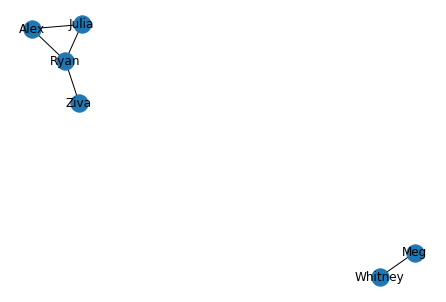

In [5]:
nx.draw(G, with_labels=True)
plt.show()

From the drawing we can see we have two pieces called <b> components </b>. Let's combine the networks by adding an edge.

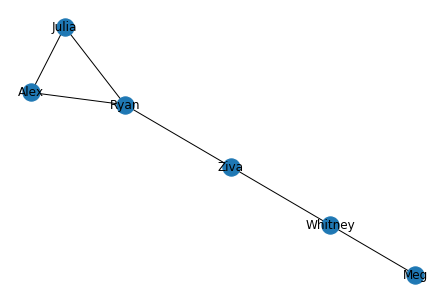

In [6]:
#add an edge to our graph to combine the two components above into a single component.
#(There is more than one way to do this)
G.add_edge("Whitney", "Ziva")


assert(nx.number_connected_components(G)) == 1

nx.draw(G, with_labels=True)
plt.show()

Let's add some more nodes and edges to our network in order to run some network statistics.

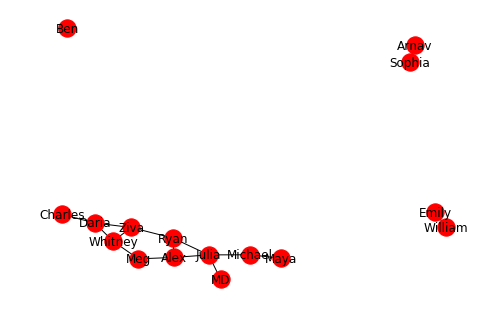

In [10]:
G.add_nodes_from(['Michael', "Daria", "Ben", "Maya", "Sophia", "Emily", "MD", "William", "Charles"]) #remember to make Ben be a loner
G.add_edges_from([('Sophia', 'Arnav'), ('Michael', 'Maya'), ('Julia', 'Michael'), ('Julia', 'MD'), 
                  ('Emily', 'William'), ('Daria', 'Ziva'), ('Charles', 'Daria'), ('Meg', 'Alex'),
                 ('Whitney', "Daria")])

nx.draw(G, with_labels=True)
plt.show()

This looks kind of funny, thankfully NetworkX has built in layouts for making our visualizations look better.

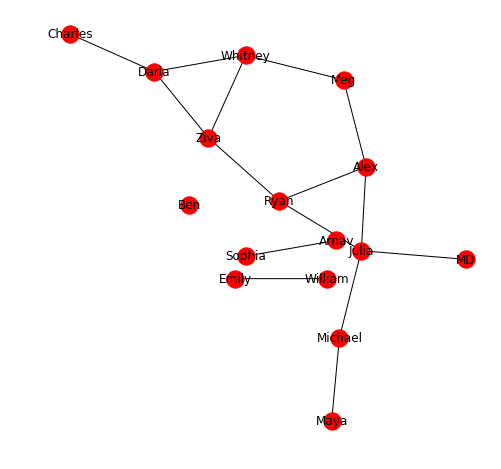

In [11]:
#using layouts to draw networks
plt.figure(figsize=[8,8])
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.axis('off')
plt.show()

There is also a built-in function for getting the degree of 
every node

In [37]:
print(G.degree())


[('Alex', 3), ('Ziva', 2), ('Julia', 5), ('Ryan', 4), ('Meg', 4), ('Whitney', 1), ('Michael', 2), ('Daria', 2), ('Ben', 0), ('Maya', 1), ('Sophia', 1), ('Emily', 1), ('MD', 1), ('William', 1), ('Charles', 1), ('Arnav', 1)]


In [7]:
#We can get each connected component using nx.connected_components()
print(sorted(nx.connected_components(G), key = len, reverse=True))

#print the number of connected components
nConnectedComponents=len(sorted(nx.connected_components(G)))
print(nConnectedComponents)
    

[{'Julia', 'Meg', 'Ziva', 'Whitney', 'Alex', 'Ryan'}]
1


In [13]:
#We can get the number of nodes in each component by list indexing
#Note: it is important to include "sorted(nx.connected_components(G), key = len) or else it is returned as a component object"
firstComponent = sorted(nx.connected_components(G), key = len, reverse=True)[0]

#fill out the rest of the variables below
secondComponent = sorted(nx.connected_components(G), key = len, reverse=True)[1]
thirdComponent = sorted(nx.connected_components(G), key = len, reverse=True)[2]
fourthComponent = sorted(nx.connected_components(G), key = len, reverse=True)[3]

#calculate what percentage of nodes are in the first (largest) connected component
allComponents=len(firstComponent)+len(secondComponent)+len(thirdComponent)+len(fourthComponent)
percentLargest = len(firstComponent)/allComponents
print(percentLargest)

TypeError: 'set' object does not support indexing

In [38]:
#if you pass both a starting node and an ending node it will return the nodes on the shortest path(s)
print(nx.shortest_path(G, 'MD', 'Daria'))

#if you only pass a source it will list the shortest paths to all nodes from the source node
startsWithZiva = nx.shortest_path(G, source = 'Ziva', target = None)

#TODO: find all the shortest paths where Whitney is the target
endsWithWhitney = nx.shortest_path(G, source = 'Whitney', target = None)

print(endsWithWhitney)

['MD', 'Julia', 'Ryan', 'Ziva', 'Daria']
{'Whitney': ['Whitney'], 'Meg': ['Whitney', 'Meg'], 'Ziva': ['Whitney', 'Ziva'], 'Daria': ['Whitney', 'Daria'], 'Alex': ['Whitney', 'Meg', 'Alex'], 'Ryan': ['Whitney', 'Ziva', 'Ryan'], 'Charles': ['Whitney', 'Daria', 'Charles'], 'Julia': ['Whitney', 'Meg', 'Alex', 'Julia'], 'Michael': ['Whitney', 'Meg', 'Alex', 'Julia', 'Michael'], 'MD': ['Whitney', 'Meg', 'Alex', 'Julia', 'MD'], 'Maya': ['Whitney', 'Meg', 'Alex', 'Julia', 'Michael', 'Maya']}


Networkx also includes builtin functionality for looking at components in networks.

In [41]:
#Using the connected_components() method by itself isn't very interesting since it yields a generator
print("components generator:", nx.connected_components(G))

#You can get the nodes in the largest component as follows
largest_cc = max(nx.connected_components(G), key=len)
print(largest_cc)

#TODO: get the nodes in the smallest component
smallest_cc = min(nx.connected_components(G), key=len)
print(smallest_cc)

components generator: <generator object connected_components at 0x101a7f2b10>
{'Charles', 'Whitney', 'Maya', 'MD', 'Daria', 'Alex', 'Michael', 'Meg', 'Ziva', 'Ryan', 'Julia'}
{'Ben'}


We can also read in network data directly from a gml file. The karate dataset is a well-known dataset of the social network of
members of the Zachary Karate Club at a univeristy. More about the dataset can be found at <a href="http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/UciData.htm#zachary">Zachary Karate Club </a>

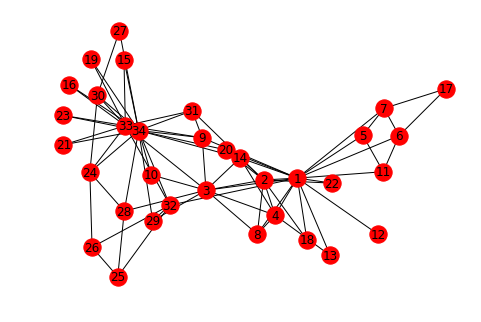

In [42]:
G_karate = nx.read_gml('/Users/marissaposner/Downloads/karate.gml', label='id')

nx.draw(G_karate, with_labels=True)
plt.show()

In [43]:
#calculating degree centrality
Cdeg_karate = nx.degree_centrality(G_karate)
print(Cdeg_karate)

#Note: the data structure of centrality measures are stored in dictionaries

{1: 0.48484848484848486, 2: 0.2727272727272727, 3: 0.30303030303030304, 4: 0.18181818181818182, 5: 0.09090909090909091, 6: 0.12121212121212122, 7: 0.12121212121212122, 8: 0.12121212121212122, 9: 0.15151515151515152, 10: 0.06060606060606061, 11: 0.09090909090909091, 12: 0.030303030303030304, 13: 0.06060606060606061, 14: 0.15151515151515152, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 19: 0.06060606060606061, 20: 0.09090909090909091, 21: 0.06060606060606061, 22: 0.06060606060606061, 23: 0.06060606060606061, 24: 0.15151515151515152, 25: 0.09090909090909091, 26: 0.09090909090909091, 27: 0.06060606060606061, 28: 0.12121212121212122, 29: 0.09090909090909091, 30: 0.12121212121212122, 31: 0.12121212121212122, 32: 0.18181818181818182, 33: 0.36363636363636365, 34: 0.5151515151515151}


In order to sort these there are several ways, but let's use pandas since we are already familiar with DataFrames

In [60]:
Cdeg_karate_node = Cdeg_karate.keys()
Cdeg_karate_k = Cdeg_karate.values()

#import pandas make a DataFrame with the columns Node and Degree_Centrality
import pandas as pd
karate_df=pd.DataFrame()
karate_df['Node'] = Cdeg_karate_node
karate_df['Degree_Centrality']=Cdeg_karate.values()
karate_df.head()

,Node,Degree_Centrality
0,1,0.484848
1,2,0.272727
2,3,0.303030
3,4,0.181818
4,5,0.090909


In [61]:
#We can see the nodes with the highest degree centrality by using the method .sort_values()
karate_df.sort_values(['Degree_Centrality'], ascending = False)

,Node,Degree_Centrality
33,34,0.515152
0,1,0.484848
32,33,0.363636
2,3,0.303030
1,2,0.272727
3,4,0.181818
31,32,0.181818
23,24,0.151515
8,9,0.151515
13,14,0.151515


In [63]:
#visualizing the network

sCdeg_karate_k = sorted(list(Cdeg_karate.values()), reverse = True)

pos = nx.kamada_kawai_layout(G_karate, weight=None) # positions for all nodes
nx.draw_networkx_nodes(G_karate, pos, 
                       cmap=plt.cm.coolwarm, node_color=list(Cdeg_karate_k))
nx.draw_networkx_edges(G_karate, pos, edge_color='lightblue')
nx.draw_networkx_labels(G_karate, pos, font_size=10, font_color='White')
plt.axis('off')
plt.title('Karate network and degree centrality')
vmin = sCdeg_karate_k[-1]
vmax = sCdeg_karate_k[0]
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, 
                           norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = plt.colorbar(sm, shrink=0.5)
cbar.ax.set_ylabel('Degree centrality')
plt.show()

TypeError: 'list' object is not callable

We can do a similar process for closeness centrality and betweenness centrality

In [64]:
#compute closeness centrality and betweenness centrality using the nx.degree_centrality and nx.betweenness_centrality
Cclose_karate = nx.degree_centrality(G)
Cbetween_karate = nx.betweenness_centrality(G)

Cclose_karate_node = Cclose_karate.keys()
Cclose_karate_k = Cclose_karate.values()

Cbetween_karate_node = Cbetween_karate.keys()
Cbetween_karate_k = Cbetween_karate.values()

In [65]:
#making DataFrames for closeness centrality and betweenness centrality
karate_close_df = pd.DataFrame()
karate_close_df['Node'] = Cclose_karate_node
karate_close_df['Closeness_Centrality']= Cclose_karate_k

karate_between_df = pd.DataFrame()
karate_between_df['Node'] = Cbetween_karate_node
karate_between_df['Betweenness_Centrality']= Cbetween_karate_k

Now there are three seperate DataFrames for each centrality measure. It is more useful to have them merged into one to be
able to compare easier.

In [67]:
#merge karate_close_df and karate_between_df into karate_df so all centrality measures are in karate_df
#use df.merge()
#what are the common columns we should be using as the fields we join on?

karate_df = karate_close_df.merge(karate_between_df,on='Node')




print(karate_df)

       Node  Closeness_Centrality  Betweenness_Centrality
0      Alex              0.200000                0.066667
1      Ziva              0.200000                0.133333
2     Julia              0.266667                0.219048
3      Ryan              0.200000                0.152381
4       Meg              0.133333                0.038095
5   Whitney              0.200000                0.038095
6   Michael              0.133333                0.085714
7     Daria              0.200000                0.085714
8       Ben              0.000000                0.000000
9      Maya              0.066667                0.000000
10   Sophia              0.066667                0.000000
11    Emily              0.066667                0.000000
12       MD              0.066667                0.000000
13  William              0.066667                0.000000
14  Charles              0.066667                0.000000
15    Arnav              0.066667                0.000000
